In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import numpy as np

In [2]:
df = pd.read_csv('2024_player_stats.csv')

In [3]:
df.head()

,Player,Games Played,Games Started,Total Minutes Played,Average Minutes Per Game,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3pts Made,3pts Attempted,...,Total Rebounds,Average Rebounds Per Game,Personal Fouls,Assists,Turnovers,Steals,Blocks,Team,Unnamed: 26,Unnamed: 27
0,"Newton, Tristen",40,40,1328,33.2,182,439,0.415,71,221,...,263,6.6,70,248,98,37,12,Uconn,NaN,NaN
1,"Spencer, Cam",40,40,1312,32.8,196,405,0.484,99,225,...,194,4.9,86,145,40,59,10,Uconn,NaN,NaN
2,"Karaban, Alex",39,39,1224,31.4,191,386,0.495,81,214,...,197,5.1,68,57,33,34,33,Uconn,NaN,NaN
3,"Clingan, Donovan",35,33,788,22.5,186,291,0.639,2,8,...,258,7.4,71,53,28,18,86,Uconn,NaN,NaN
4,"Castle, Stephon",34,30,918,27.0,137,290,0.472,20,75,...,159,4.7,82,99,51,27,18,Uconn,NaN,NaN


In [4]:
df.isna().sum()

Player                         0
Games Played                   0
Games Started                  0
Total Minutes Played           0
Average Minutes Per Game       0
Field Goals Made               0
Field Goals Attempted          0
Field Goals Percentage         0
3pts Made                      0
3pts Attempted                 0
3pts Percentage                0
Free Throws Made               0
Free Throws Attempted          0
Free Throws Percentage         0
Total Points                   0
Average Points Per Game        0
Offensive Rebounds             0
Defensive Rebounds             0
Total Rebounds                 0
Average Rebounds Per Game      0
Personal Fouls                 0
Assists                        0
Turnovers                      0
Steals                         0
Blocks                         0
Team                           0
Unnamed: 26                  904
Unnamed: 27                  904
dtype: int64

In [5]:
df.drop('Unnamed: 26', axis=1, inplace=True)
df.drop('Unnamed: 27', axis=1, inplace=True)

In [6]:
# drop players with 100% scoring percentage b/c they played 1 game, i.e. does not actually affect team
df = df[df['Field Goals Percentage'] != 1] 

In [7]:
df.head()

,Player,Games Played,Games Started,Total Minutes Played,Average Minutes Per Game,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3pts Made,3pts Attempted,...,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Average Rebounds Per Game,Personal Fouls,Assists,Turnovers,Steals,Blocks,Team
0,"Newton, Tristen",40,40,1328,33.2,182,439,0.415,71,221,...,57,206,263,6.6,70,248,98,37,12,Uconn
1,"Spencer, Cam",40,40,1312,32.8,196,405,0.484,99,225,...,42,152,194,4.9,86,145,40,59,10,Uconn
2,"Karaban, Alex",39,39,1224,31.4,191,386,0.495,81,214,...,56,141,197,5.1,68,57,33,34,33,Uconn
3,"Clingan, Donovan",35,33,788,22.5,186,291,0.639,2,8,...,87,171,258,7.4,71,53,28,18,86,Uconn
4,"Castle, Stephon",34,30,918,27.0,137,290,0.472,20,75,...,57,102,159,4.7,82,99,51,27,18,Uconn


In [8]:
team_names=df['Team'].unique()

In [9]:
len(team_names)

64

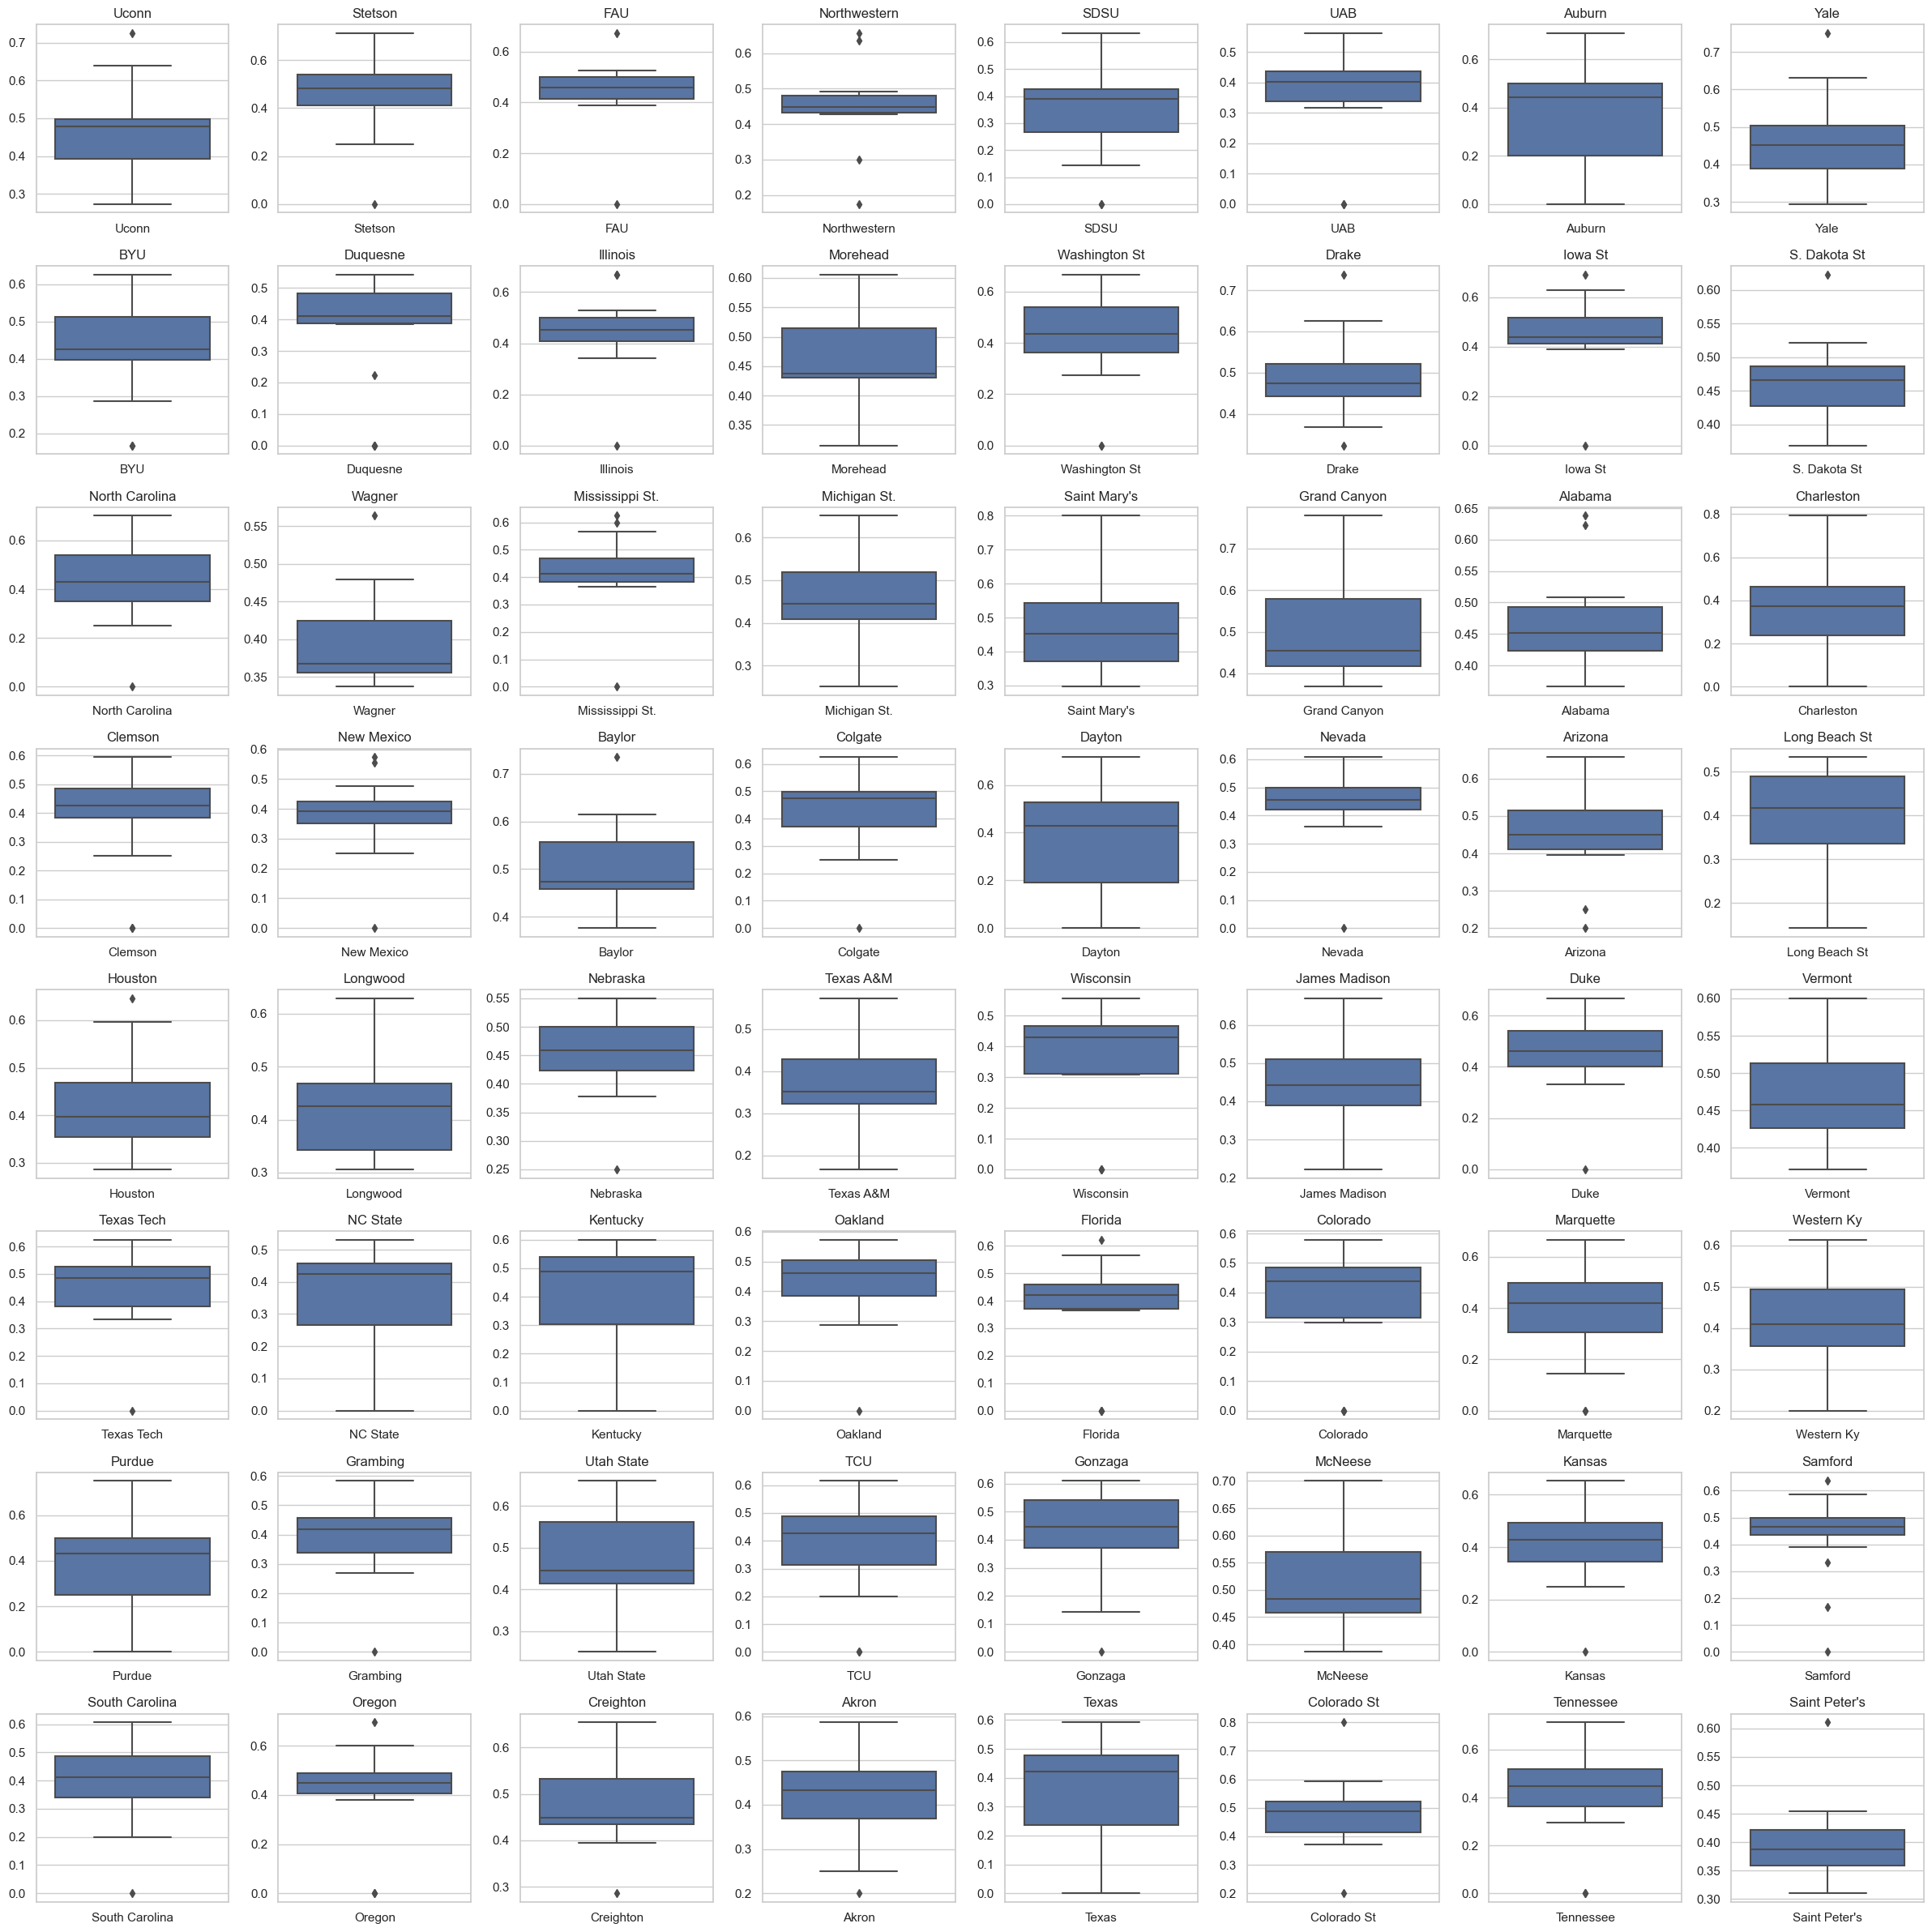

In [10]:
# Set viz
sns.set(style="whitegrid")

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(24, 24))

# Plot the distribution of field goal % per Team
for i in range(8):
    for j in range(8):
        team = team_names[i * 8 + j]
        sns.boxplot(x='Team', y='Field Goals Percentage', data=df[df['Team'] == team], ax=axes[i, j])
        axes[i, j].set_title(team)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [11]:
# top 4 teams
top_4 = ['Uconn','Purdue','Alabama','NC State']

# df of just top 4 teams
filtered_df = df[df['Team'].isin(top_4)]

In [12]:
df.columns

Index(['Player', 'Games Played', 'Games Started', 'Total Minutes Played',
       'Average Minutes Per Game', 'Field Goals Made', 'Field Goals Attempted',
       'Field Goals Percentage', '3pts Made', '3pts Attempted',
       '3pts Percentage', 'Free Throws Made', 'Free Throws Attempted',
       'Free Throws Percentage', 'Total Points', 'Average Points Per Game',
       'Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds',
       'Average Rebounds Per Game', 'Personal Fouls', 'Assists', 'Turnovers',
       'Steals', 'Blocks', 'Team'],
      dtype='object')

In [13]:
stats = ['Field Goals Attempted',
       'Field Goals Percentage','3pts Attempted',
       '3pts Percentage','Free Throws Attempted',
       'Free Throws Percentage','Offensive Rebounds', 'Defensive Rebounds', 'Total Rebounds',
       'Average Rebounds Per Game', 'Personal Fouls', 'Assists', 'Turnovers',
       'Steals', 'Blocks']

In [33]:
def make_boxplots(data, teams, stats, differentiation,color):
    """
    makes boxplots showing the distribution among players per team for a certain statistic 
    (i.e. field goal percentage or defensive rebounds)
    
    
    input: data (df), teams(list), which statistics to visualize (list), differentiation (str), color (str)
    output: graph of 4 suplots(boxplots), 2x2, per statistic, each boxplot representing a different team
    
    """
    
    for x in stats:
        sns.set(style="whitegrid")


        # Create a 2x2 grid of subplots
        fig, axes = plt.subplots(2, 2, figsize=(7, 7))

        # Plot the distribution of statistic for each of the top 4 teams
        for i in range(2):
            for j in range(2):
                team = teams[i * 2 + j]
                sns.boxplot(x='Team', y=x, data=data[data['Team'] == team], ax=axes[i, j],color=color)
                axes[i, j].set_title(team)
                axes[i, j].set_xlabel('')
                axes[i, j].set_ylabel('')

                fig.suptitle(f'{x} Dist. Among Players for {differentiation} Teams')

        # Adjust layout
        plt.tight_layout()
        plt.show()

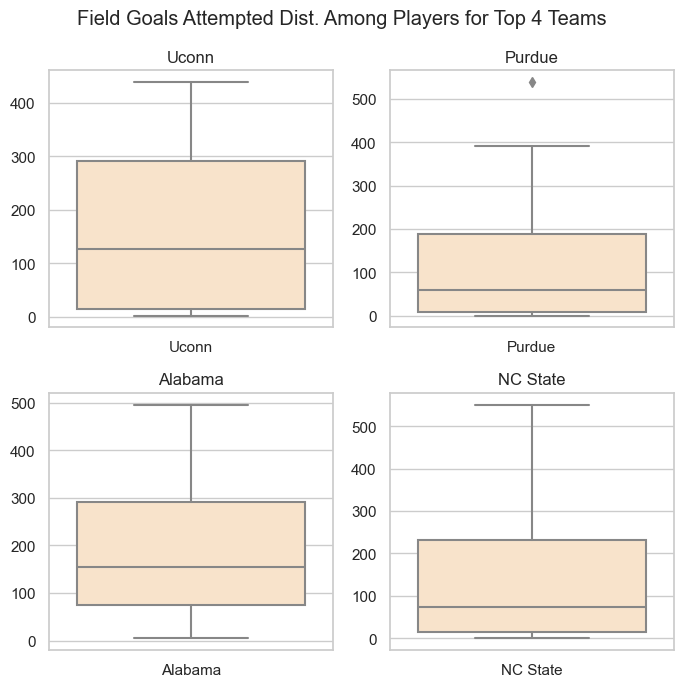

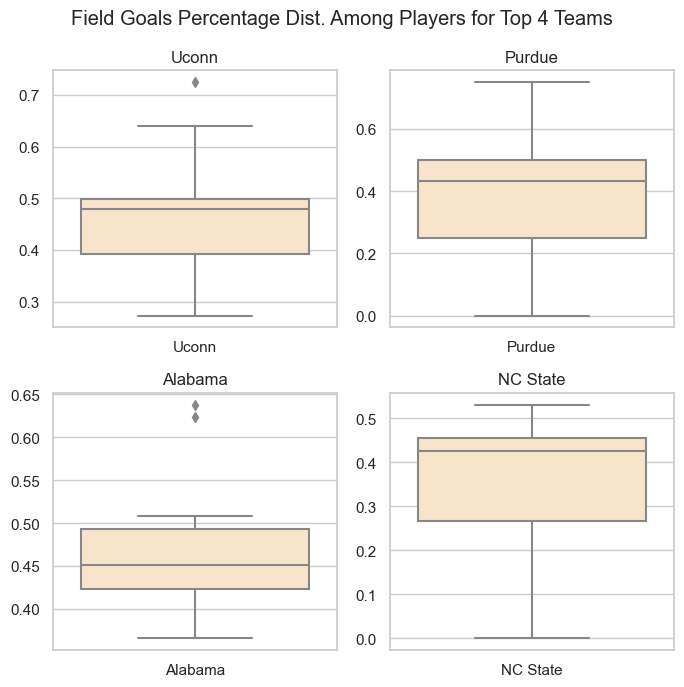

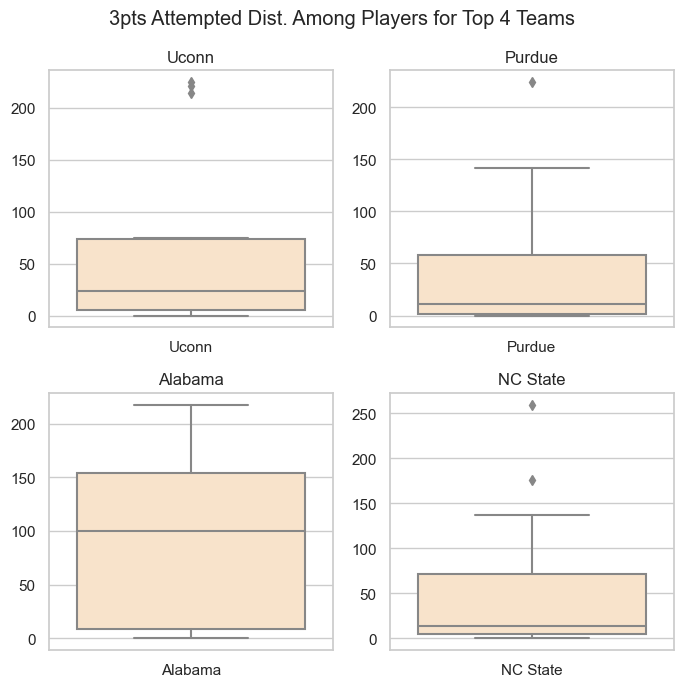

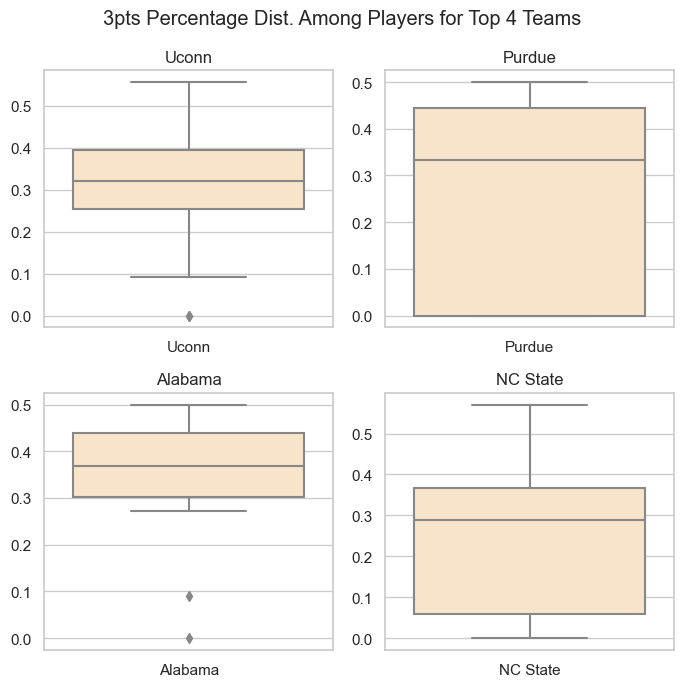

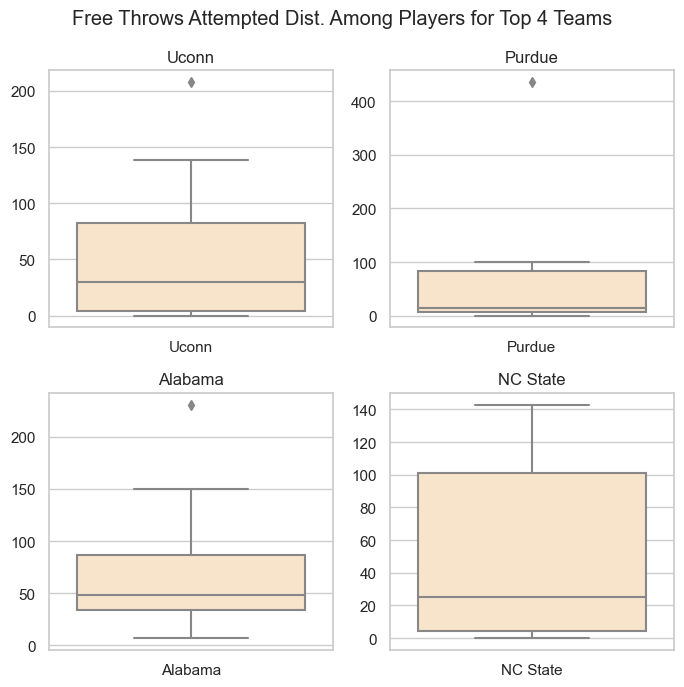

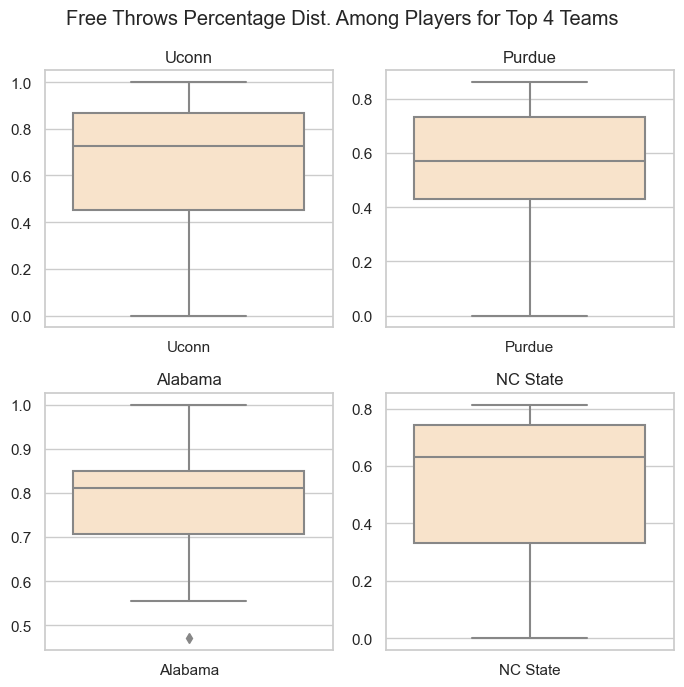

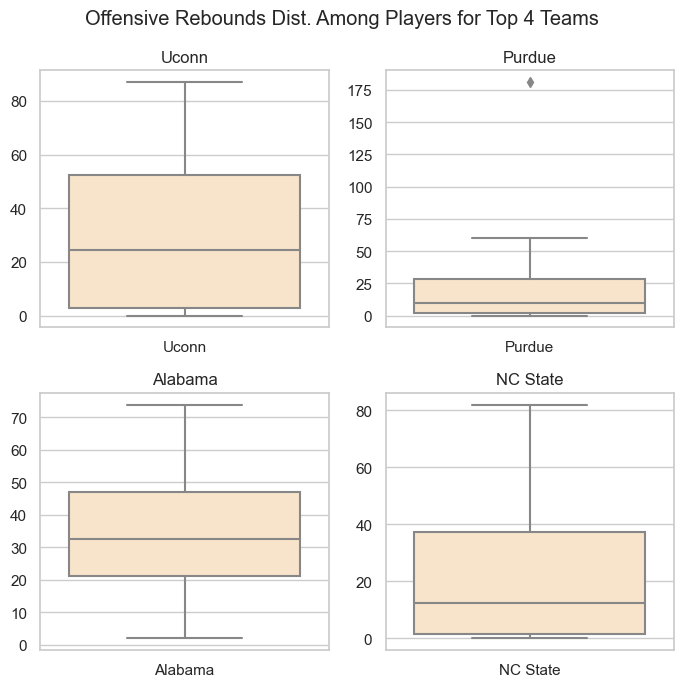

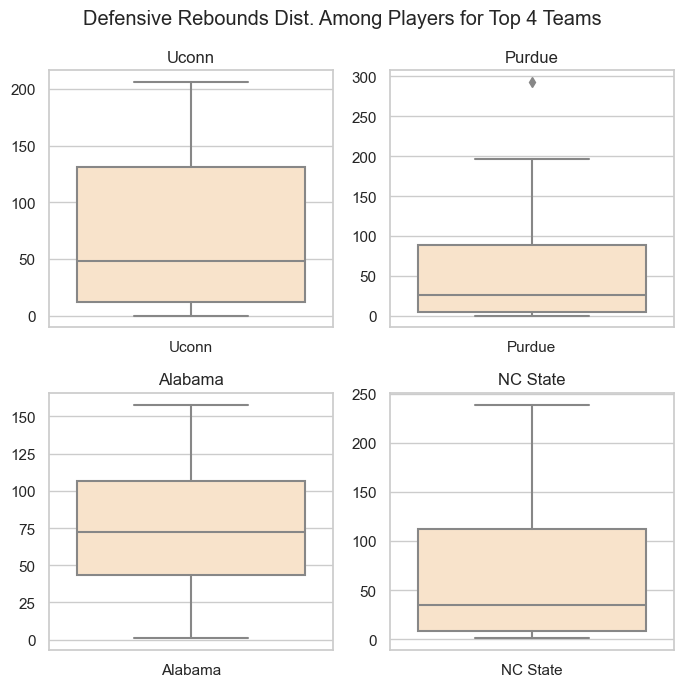

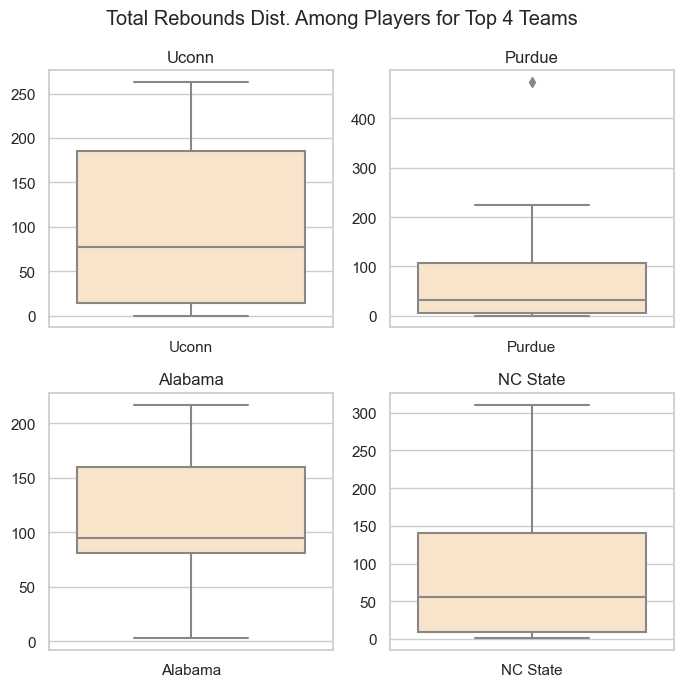

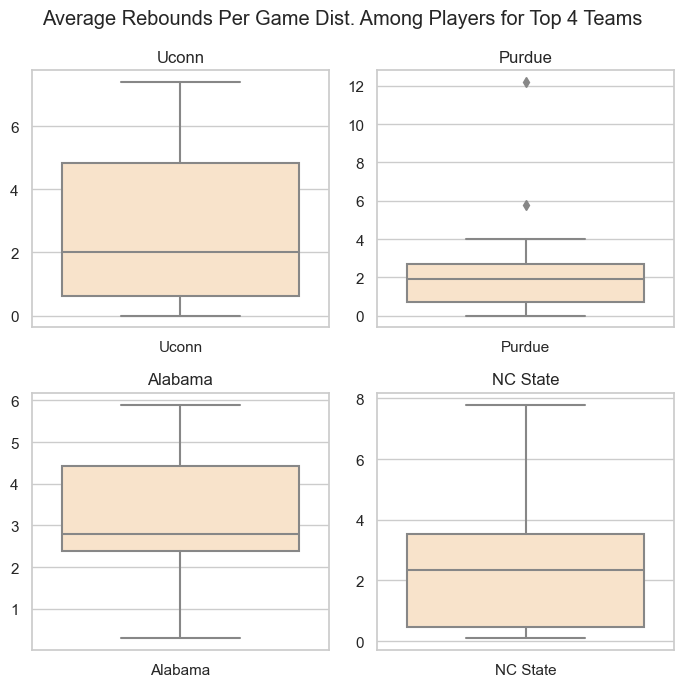

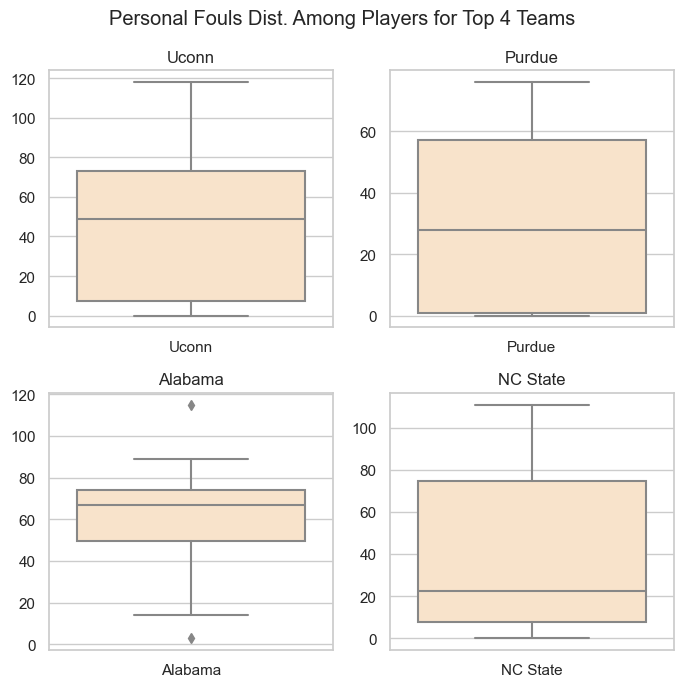

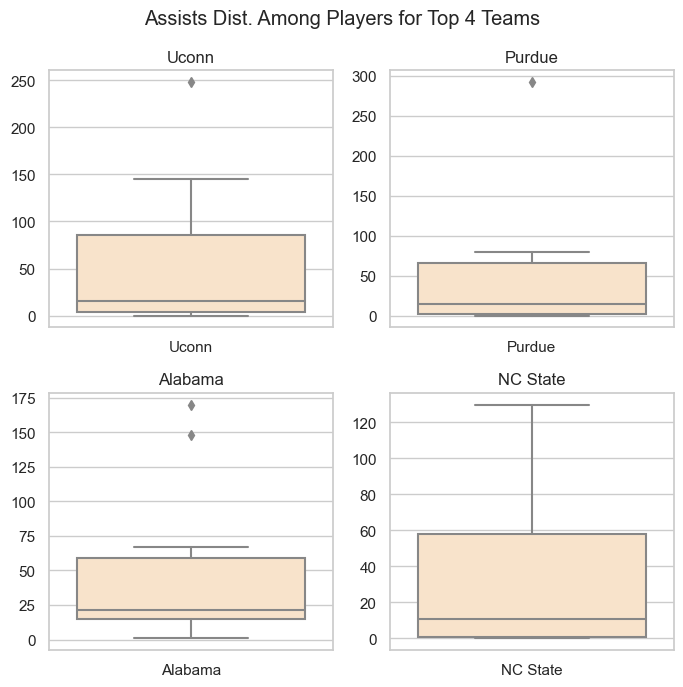

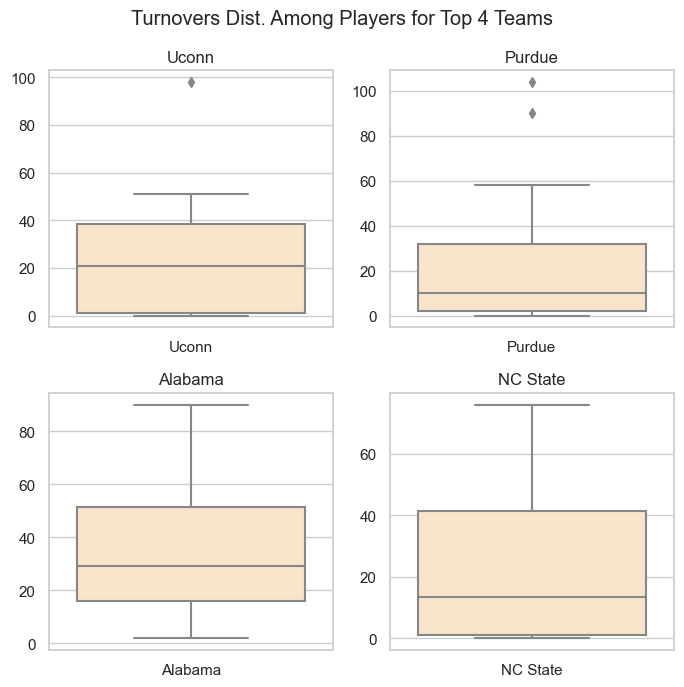

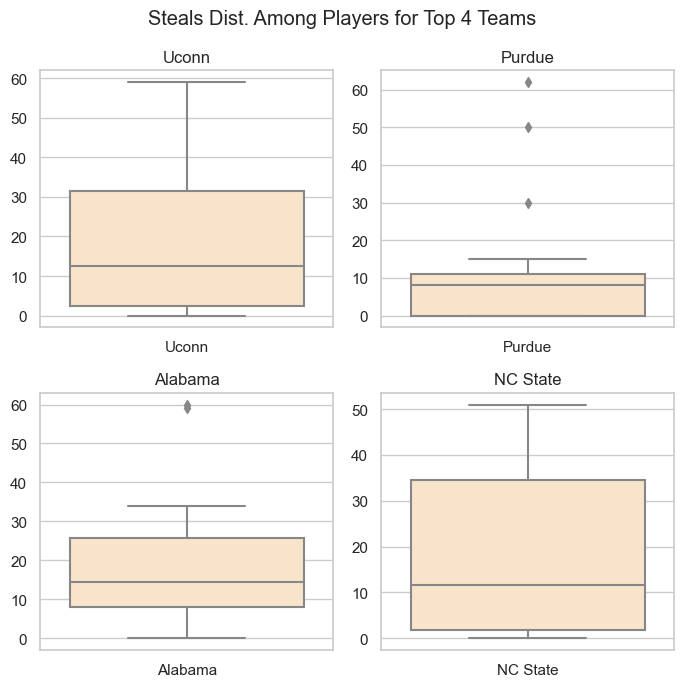

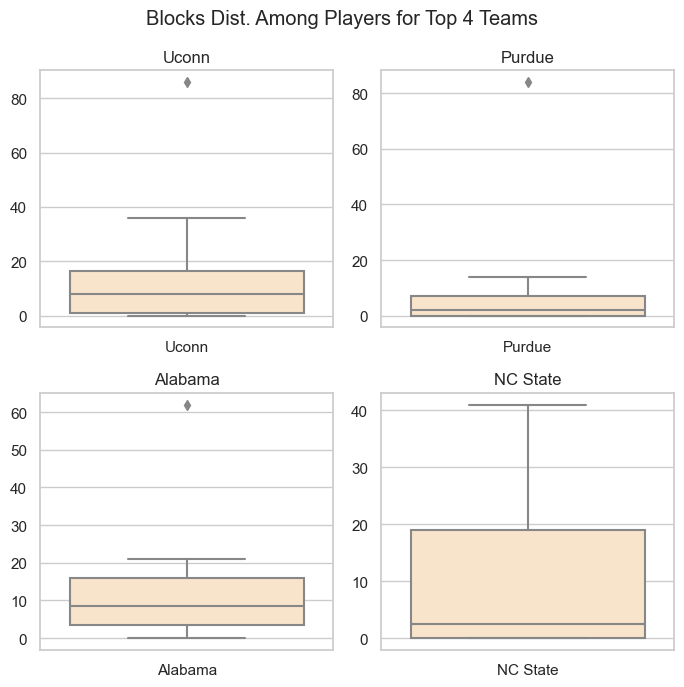

In [36]:
make_boxplots(filtered_df,top_4,stats,'Top 4','bisque')

In [16]:
# four teams with high seeds that lost in the first round
# sorry about the list name, but it is true
bad_teams=['Stetson',"Saint Peter's",'Long Beach St','Longwood']

# df of just bottom teams
filtered_df_bad = df[df['Team'].isin(bad_teams)]



In [46]:
filtered_df_bad.describe()

,Games Played,Games Started,Total Minutes Played,Average Minutes Per Game,Field Goals Made,Field Goals Attempted,Field Goals Percentage,3pts Made,3pts Attempted,3pts Percentage,...,Average Points Per Game,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Average Rebounds Per Game,Personal Fouls,Assists,Turnovers,Steals,Blocks
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,...,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,25.245614,12.105263,491.228070,16.180702,63.052632,143.421053,0.422526,15.789474,46.912281,0.280825,...,5.821053,25.421053,56.666667,82.087719,2.736842,42.368421,31.771930,27.842105,16.684211,8.491228
std,10.912445,13.042081,396.740065,10.399286,62.750191,139.932247,0.120609,21.875244,59.384125,0.161652,...,5.039123,27.686992,55.813252,81.289008,2.258052,32.996554,43.817812,27.421830,15.991245,12.252001
min,1.000000,0.000000,5.000000,2.200000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,135.000000,6.200000,11.000000,27.000000,0.340000,2.000000,5.000000,0.222000,...,1.900000,5.000000,10.000000,15.000000,0.900000,15.000000,5.000000,5.000000,3.000000,1.000000
50%,31.000000,10.000000,449.000000,16.600000,47.000000,115.000000,0.419000,7.000000,23.000000,0.308000,...,4.300000,17.000000,48.000000,67.000000,2.200000,40.000000,13.000000,23.000000,12.000000,3.000000
75%,35.000000,23.000000,809.000000,25.300000,119.000000,215.000000,0.500000,24.000000,78.000000,0.377000,...,9.800000,35.000000,93.000000,140.000000,4.100000,70.000000,42.000000,43.000000,27.000000,9.000000
max,36.000000,35.000000,1216.000000,34.700000,244.000000,570.000000,0.712000,110.000000,289.000000,0.667000,...,21.300000,118.000000,244.000000,362.000000,10.300000,113.000000,203.000000,99.000000,61.000000,53.000000


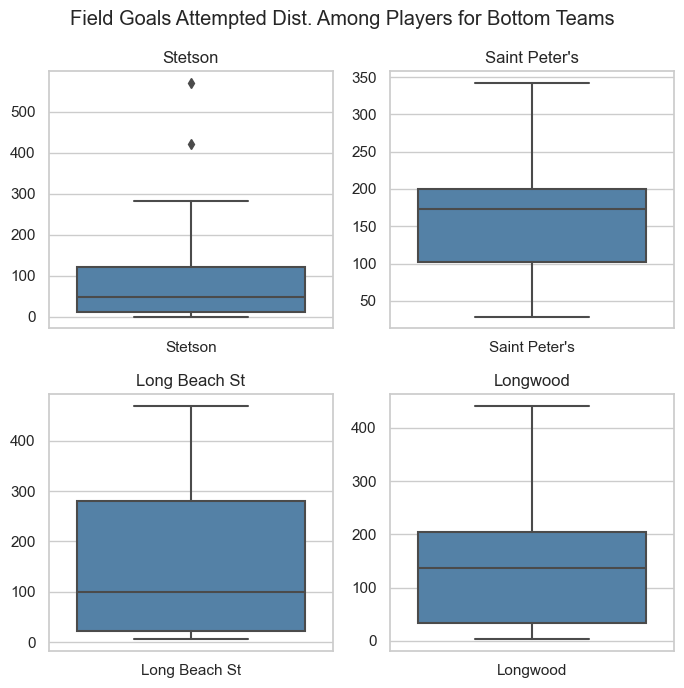

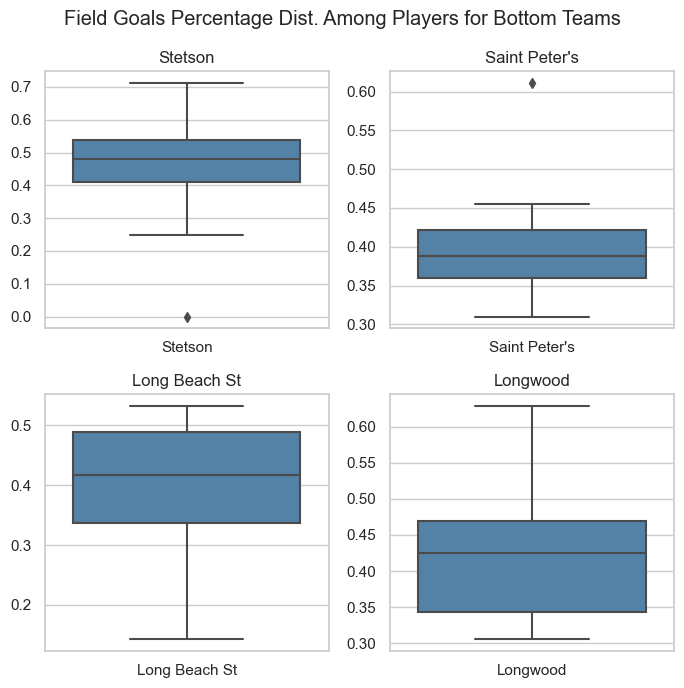

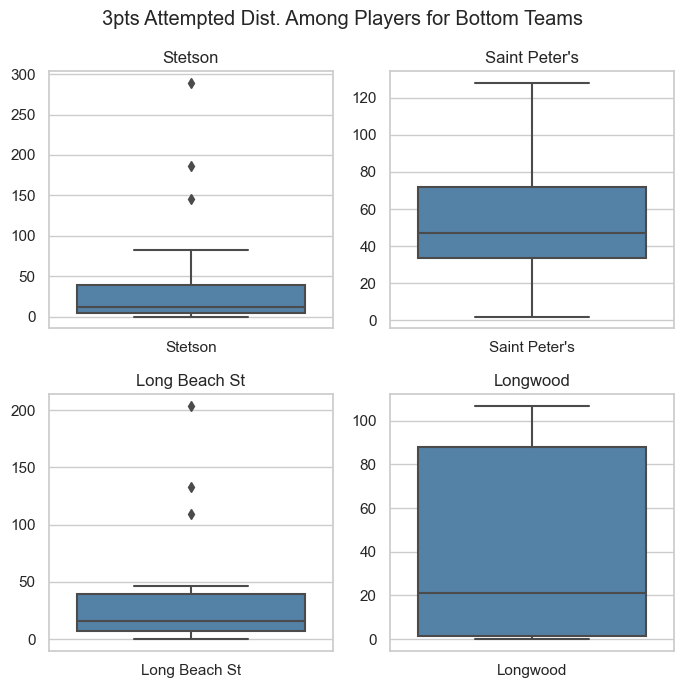

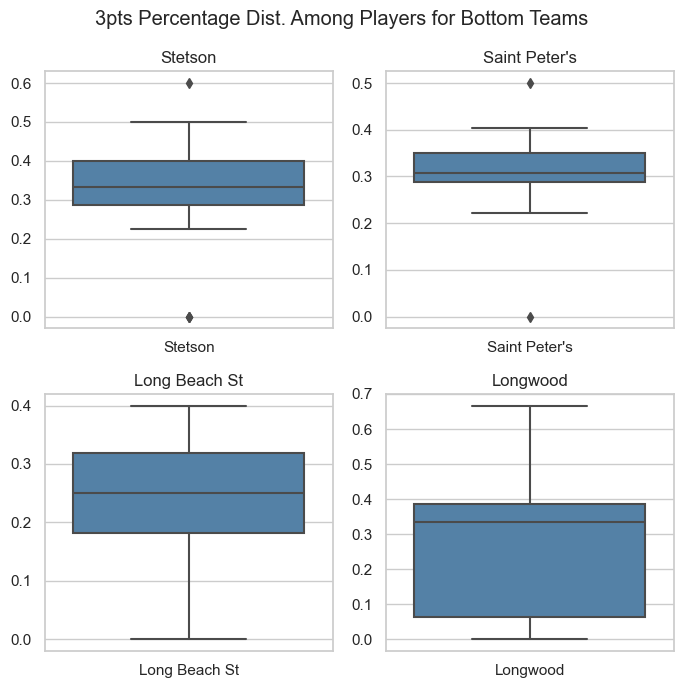

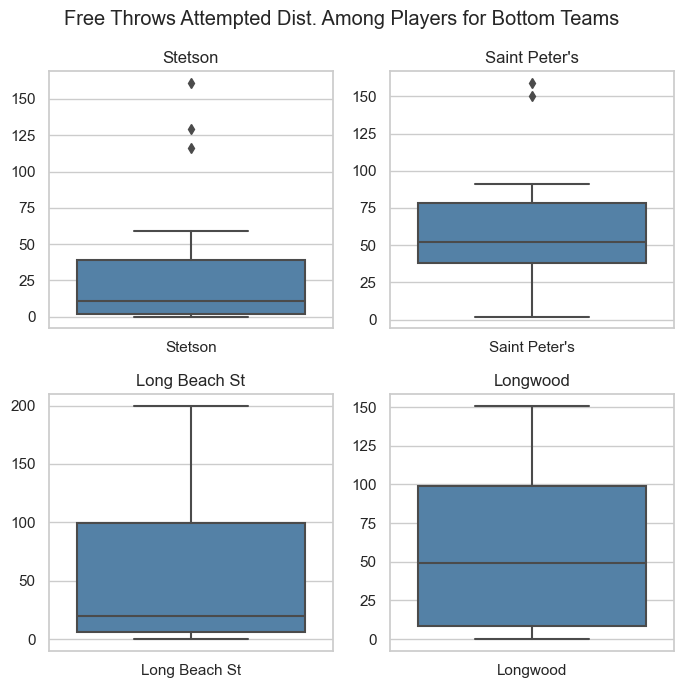

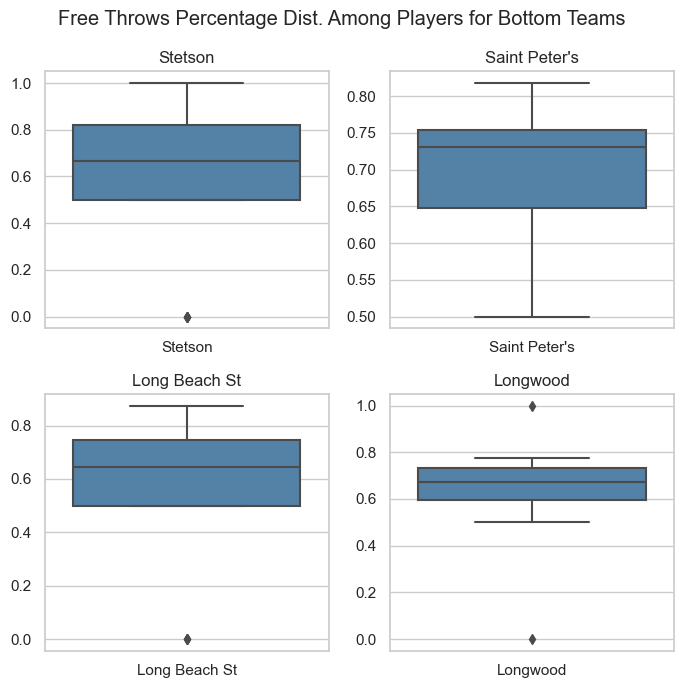

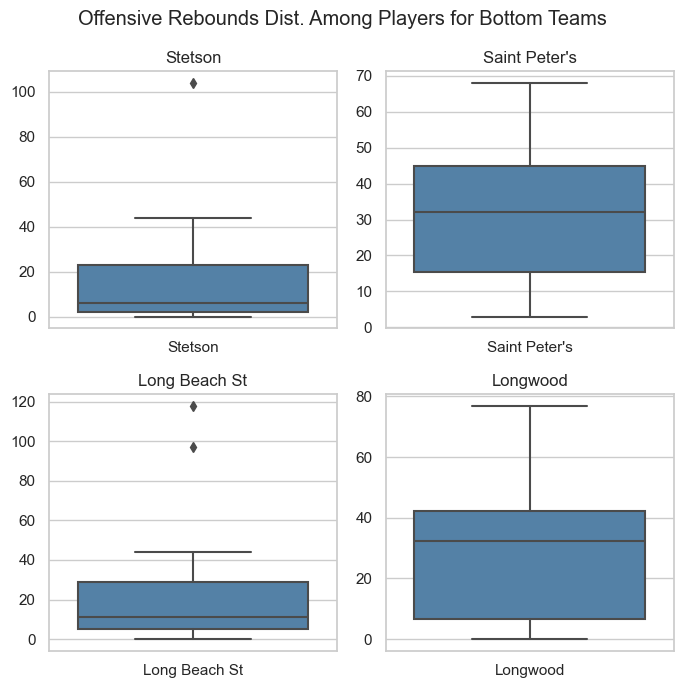

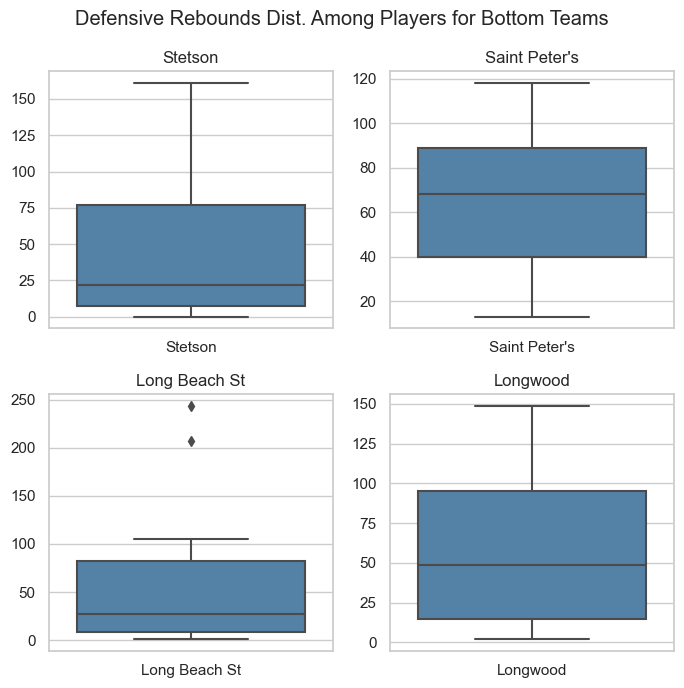

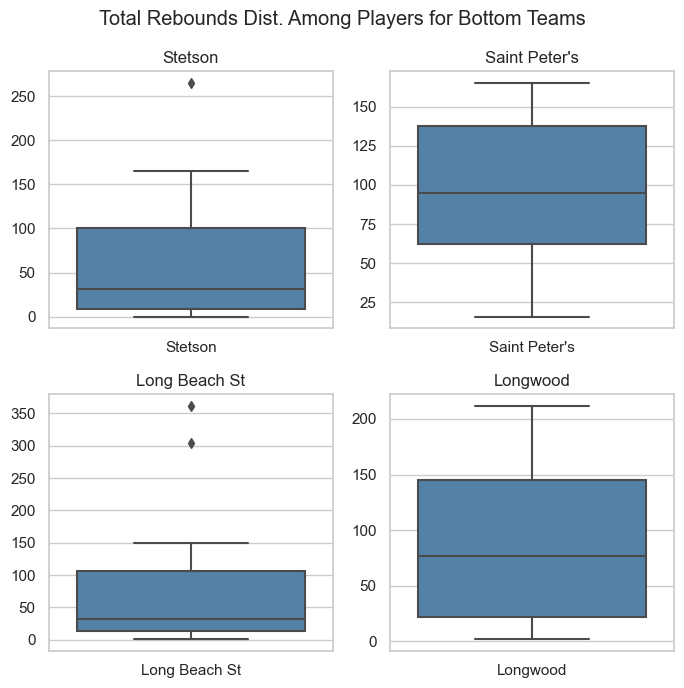

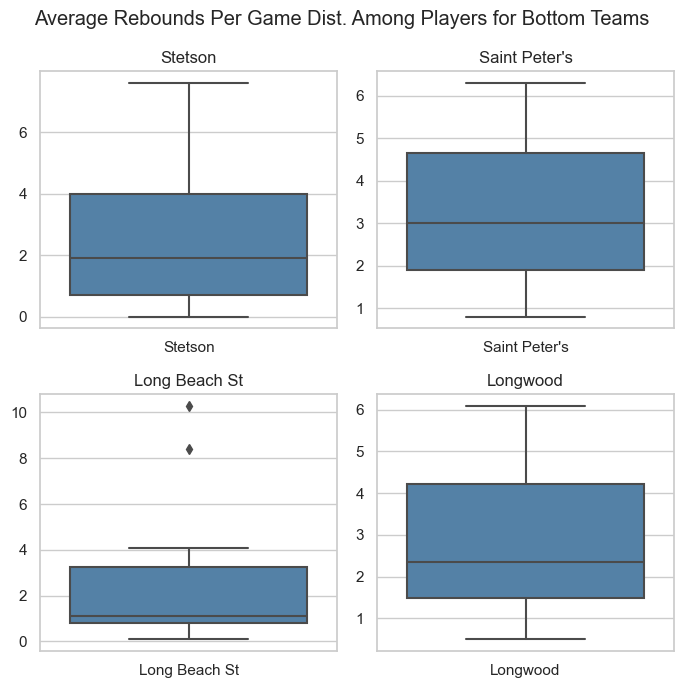

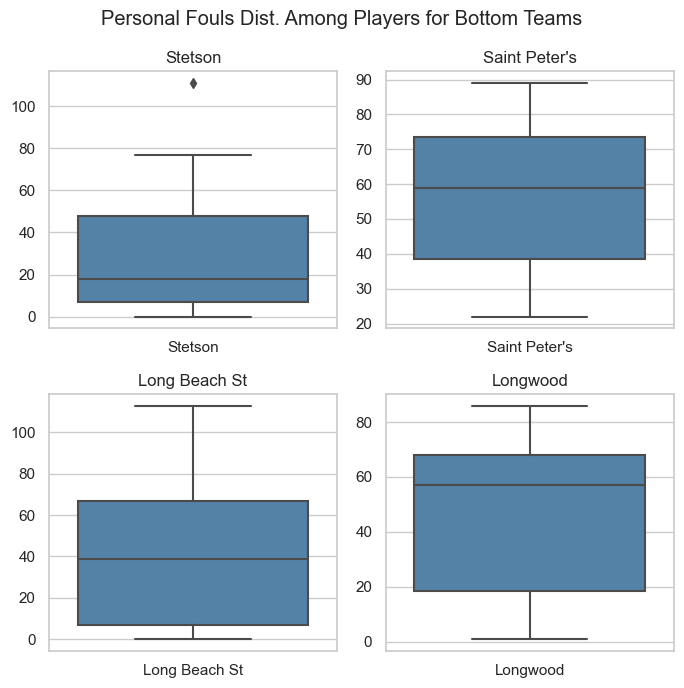

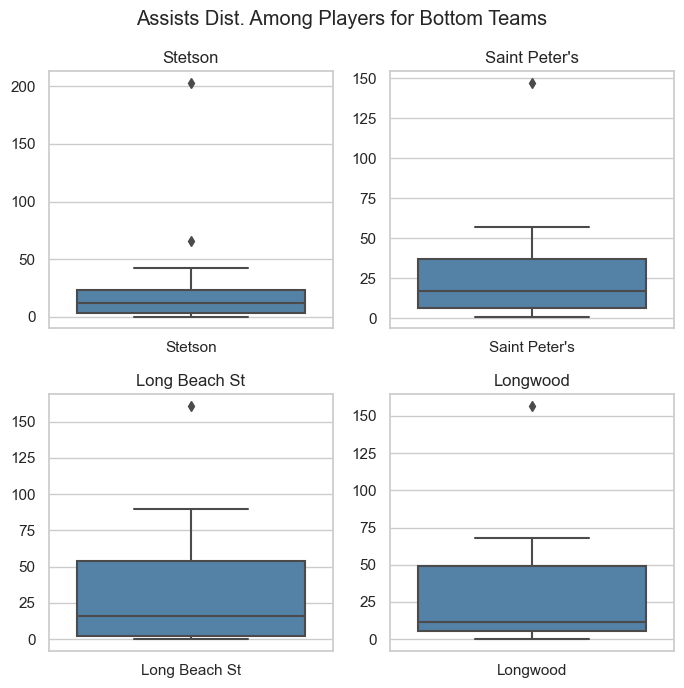

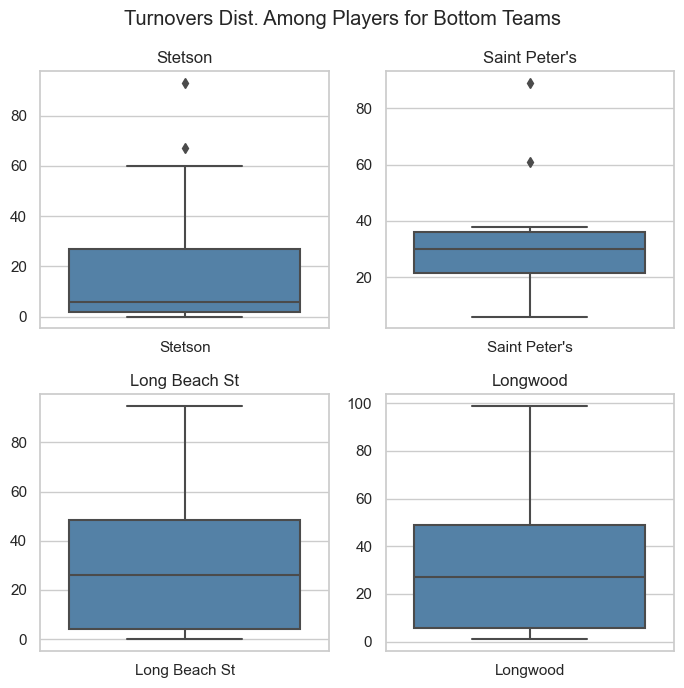

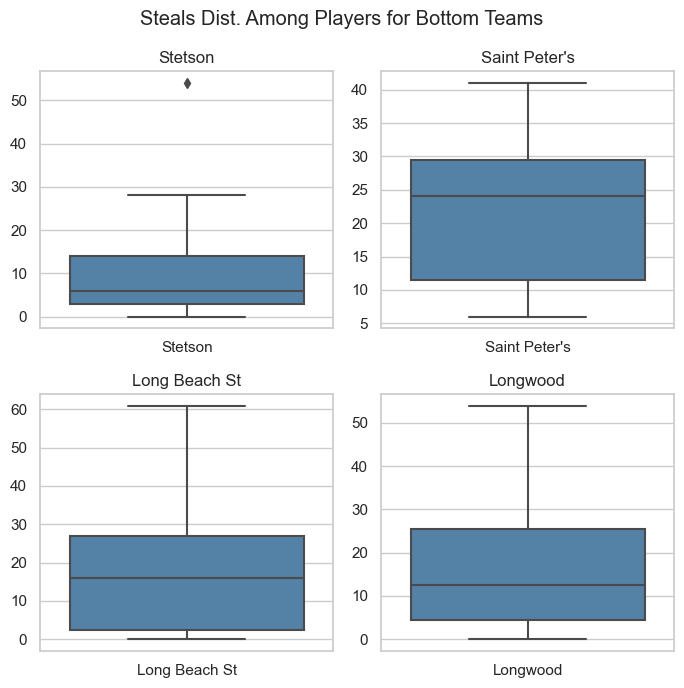

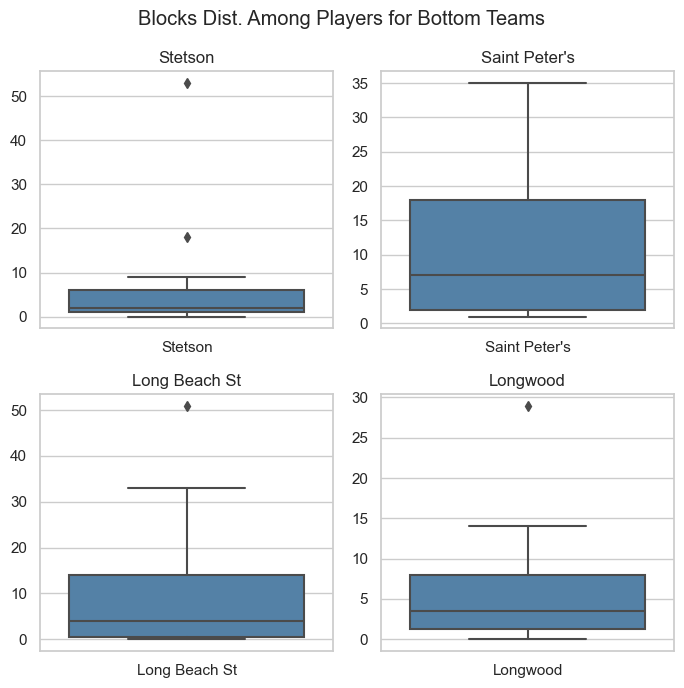

In [44]:
make_boxplots(filtered_df_bad,bad_teams,stats,'Bottom','steelblue')

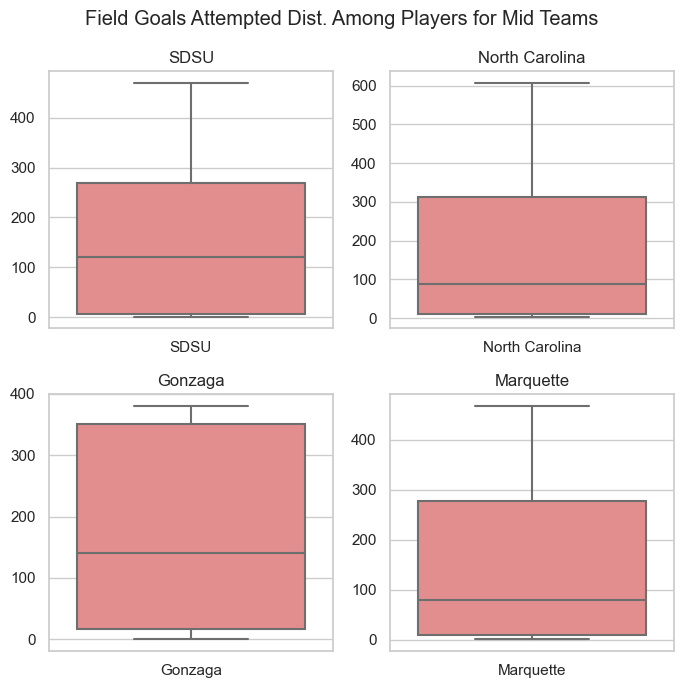

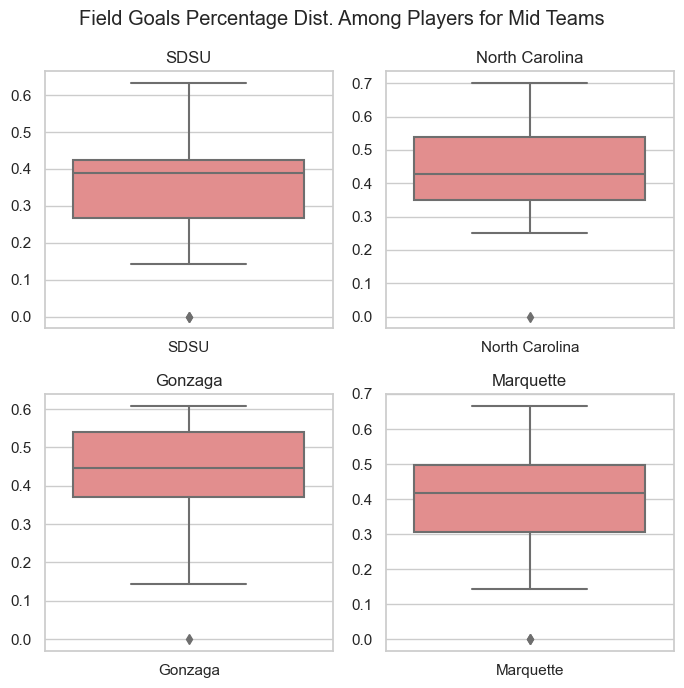

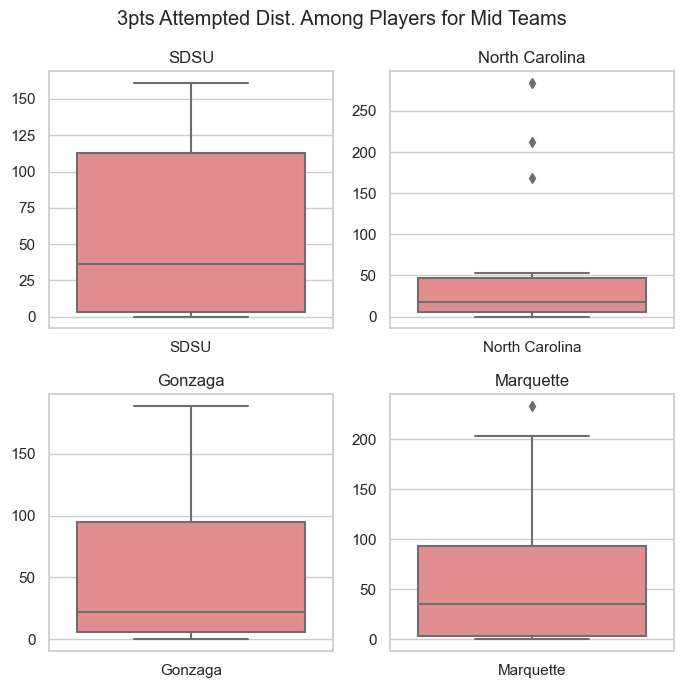

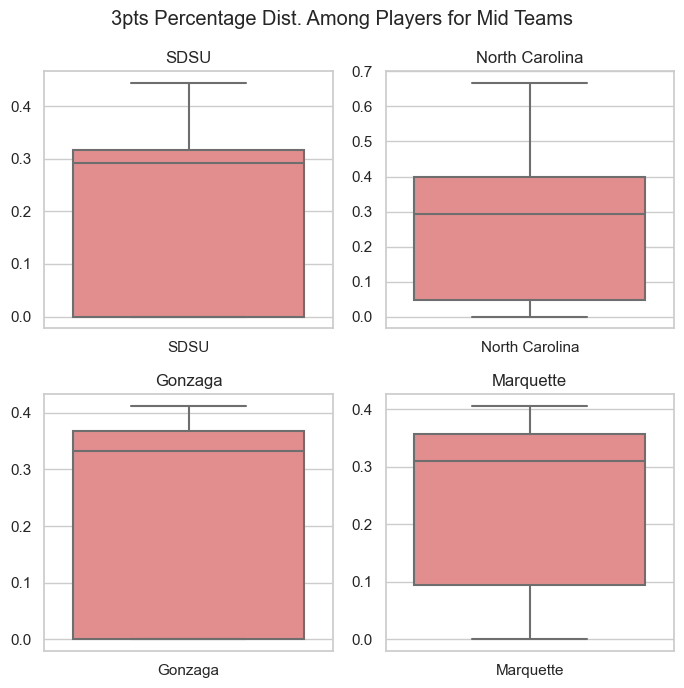

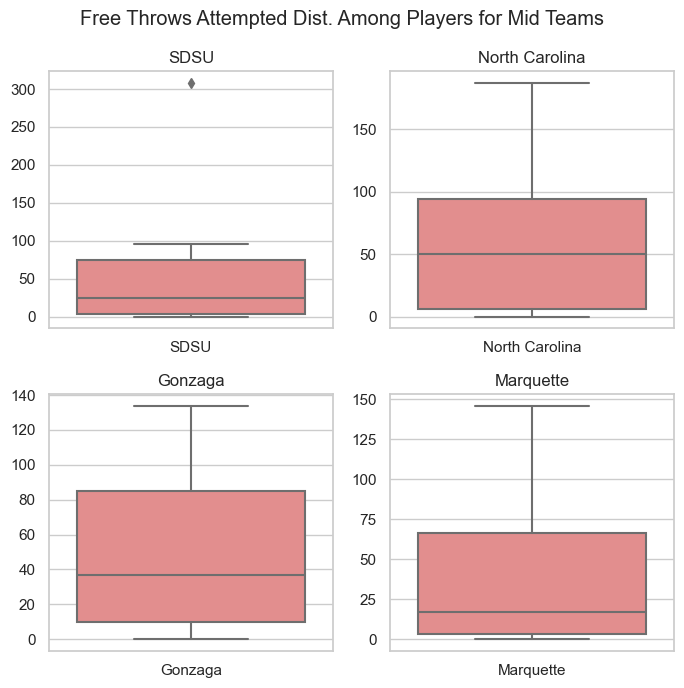

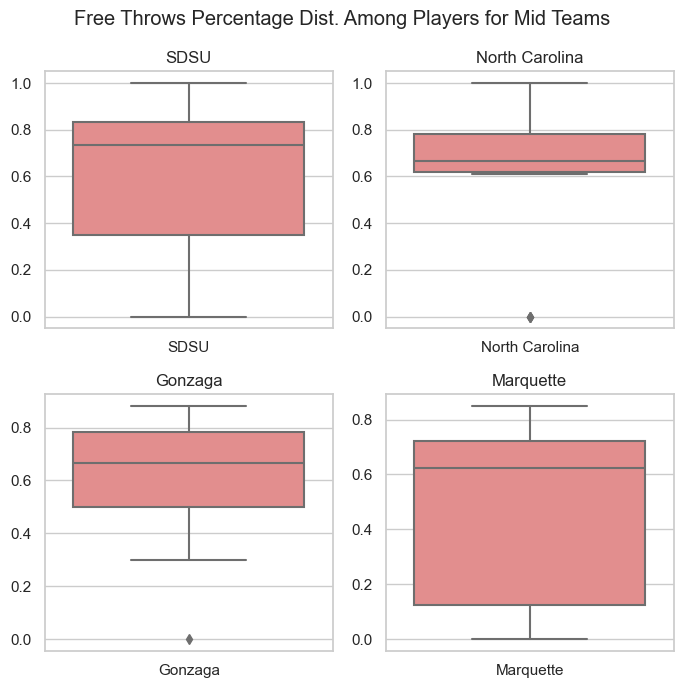

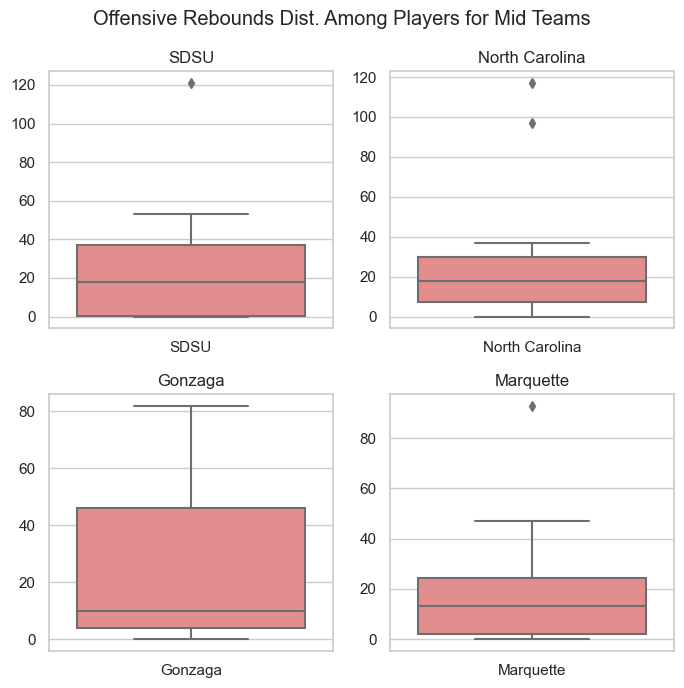

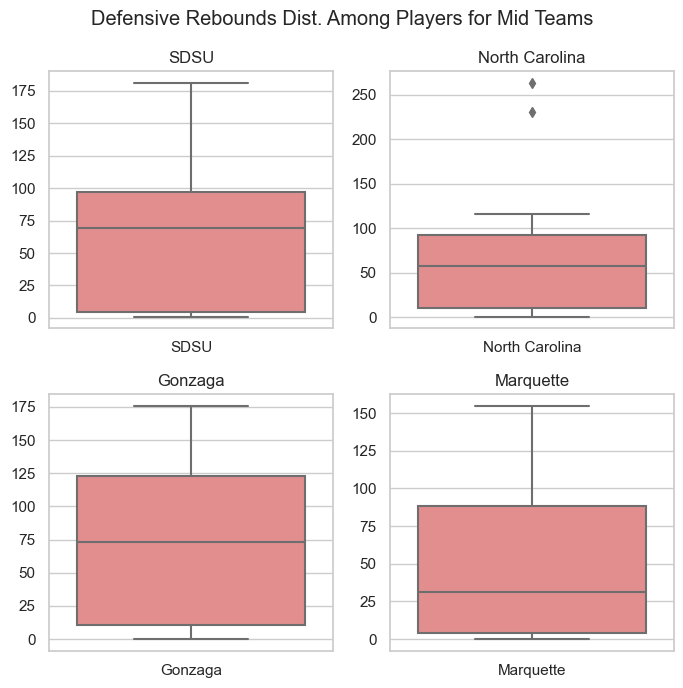

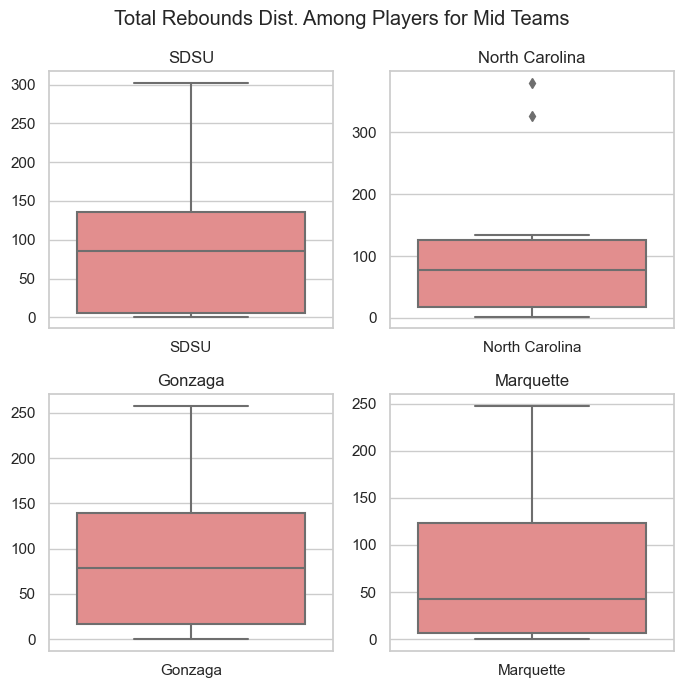

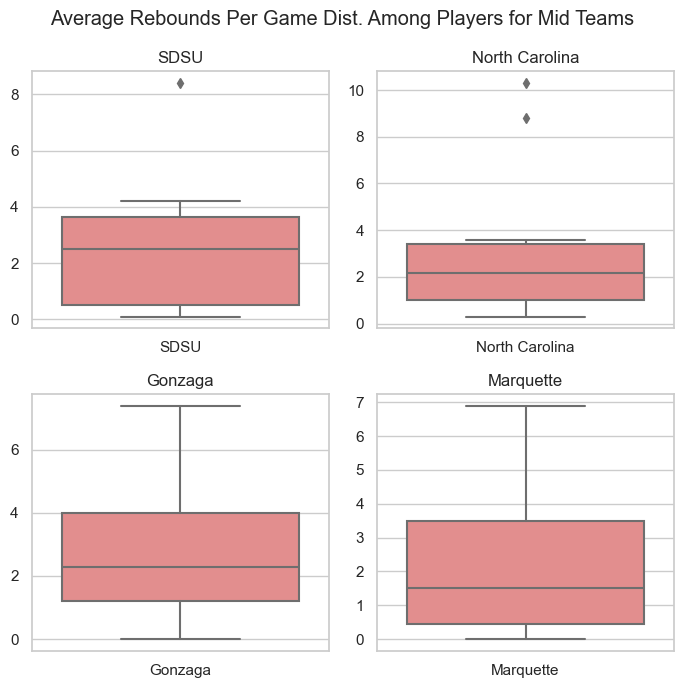

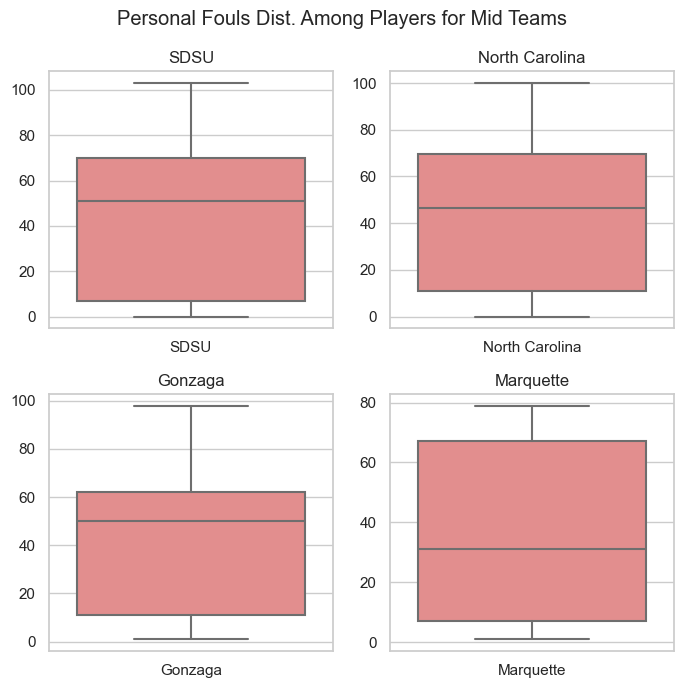

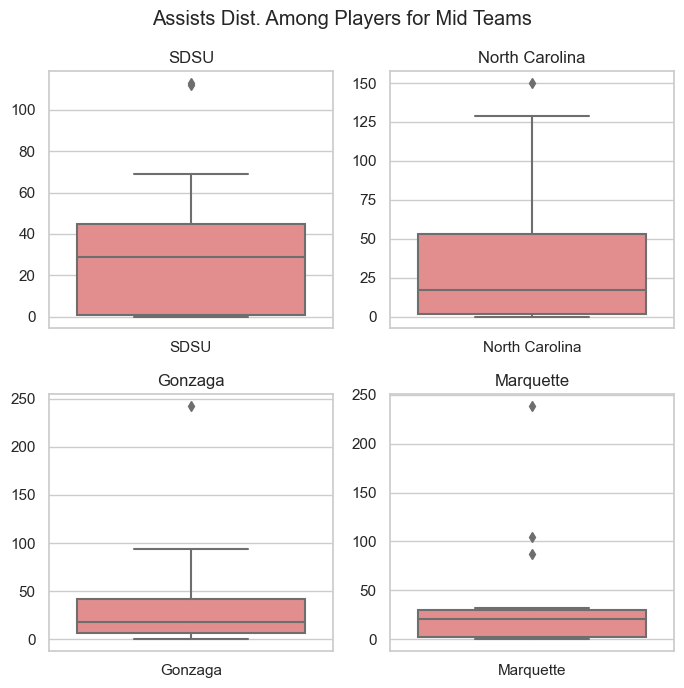

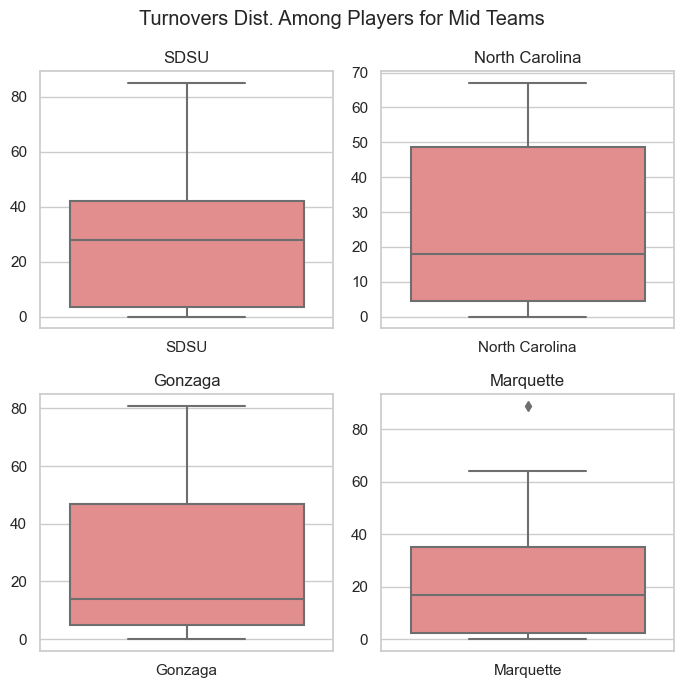

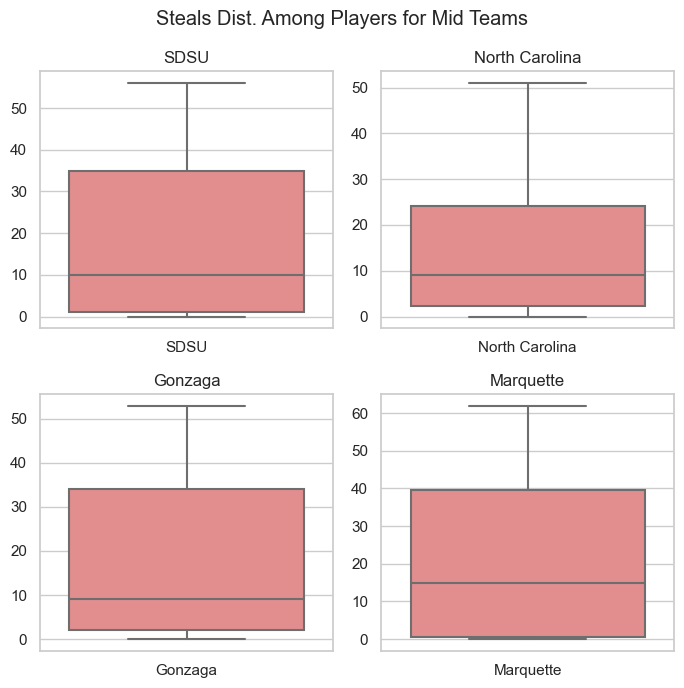

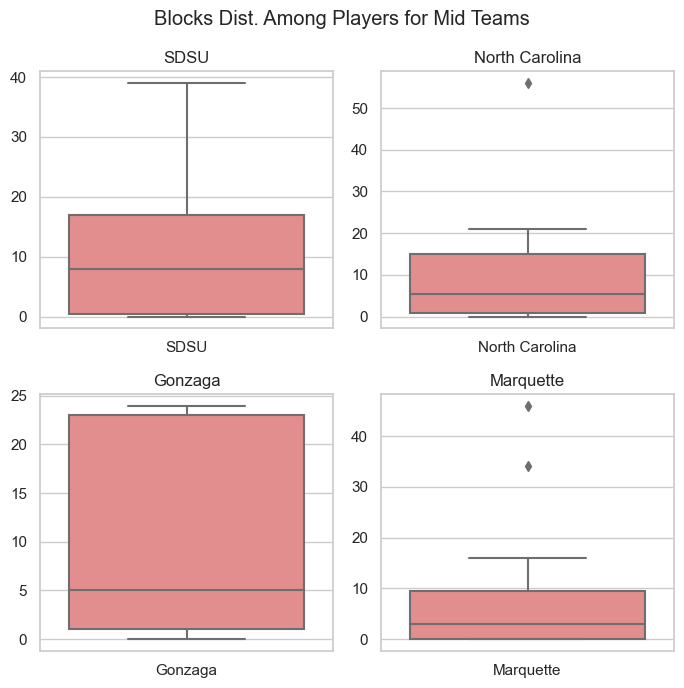

In [45]:
# four teams that made it to sweet 16, but not beyond
mid_teams=['SDSU','North Carolina','Gonzaga','Marquette']

# df of just mid teams
filtered_df_mid = df[df['Team'].isin(mid_teams)]

make_boxplots(filtered_df_mid,mid_teams,stats,'Mid','lightcoral')

In [ ]:
# Set viz
sns.set(style="whitegrid")

# Create an 8x8 grid of subplots
fig, axes = plt.subplots(8, 8, figsize=(24, 24))

# Plot the distribution of field goal % per Team
for i in range(8):
    for j in range(8):
        team = team_names[i * 8 + j]
        sns.boxplot(x='Team', y='Field Goals Attempted', data=df[df['Team'] == team], ax=axes[i, j])
        axes[i, j].set_title(team)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()